## 26 - Reciprocal Cycles

<p>A unit fraction contains $1$ in the numerator. The decimal representation of the unit fractions with denominators $2$ to $10$ are given:</p>
\begin{align}
1/2 = 0.5\\
1/3 =0.(3)\\
1/4 =0.25\\
1/5 = 0.2\\
1/6 = 0.1(6)\\
1/7 = 0.(142857)\\
1/8 = 0.125\\
1/9 = 0.(1)\\
1/10= 0.1
\end{align}
<p>Where $0.1(6)$ means $0.166666\cdots$, and has a $1$-digit recurring cycle. It can be seen that $1/7$ has a $6$-digit recurring cycle.</p>
<p>Find the value of $d \lt 1000$ for which $1/d$ contains the longest recurring cycle in its decimal fraction part.</p>


In [33]:
#thought excercise: consider 1/4:
result = 1//4
remainder = 1%4
print(result, remainder)

0 1


In [34]:
#carry the remainder
result = (remainder * 10)//4
remainder = (remainder *10) %4
print(result, remainder)

2 2


In [35]:
#carry the remainder again
result = (remainder * 10)//4
remainder = (remainder *10) %4
print(result, remainder)

5 0


When the remainder is 0, we see that the divisors for each decimal level are 0, 2, 5, meaning 1/4 = 0.25. Now we do the same for 1/3:

In [42]:
result = 1//3
remainder = 1%3
print(result, remainder)

0 1


In [43]:

#carry the remainder
result = (remainder * 10)//3
remainder = (remainder *10) %3
print(result, remainder)

3 1


We see that since the remainder is 1 as before, the result will be the same. Therefore we know that if we encounter a remainder we have already seen we are entering a recurring decimal?

In [108]:
def check_recurring(d):
    result = 1//d
    remainder = 1%d
    remainders = []
    seq = []
    while remainder > 0:
        if remainder in remainders: #check if we have seen this remainder before, if so, reciprocal cycle confirmed
            return (True, d, seq)
        remainders.append(remainder) #add remainder to set
        result = (remainder * 10) // d #carry the remainder to next decimal place up
        remainder = (remainder *10) % d #find new remainder
        seq.append(result) #add result to decimal sequence
    return (False, d, seq) #if remainder ever becomes 0 we have divided the whole number and the sequence is not recurring
        
    

In [109]:
check_recurring(7)

[True, 7, [1, 4, 2, 8, 5, 7]]

In [121]:
1/31

0.03225806451612903

In [123]:
current_longest = 0
current_d = 0
for i in range(1,1000, 1):
    rec, d, seq = check_recurring(i)
    if rec and len(seq) > current_longest:
        current_longest = len(seq)
        current_d = d
            
    

In [125]:
current_d

983

## 27 - Quadratic primes

<p>Euler discovered the remarkable quadratic formula:</p>
<p class="center">$n^2 + n + 41$</p>
<p>It turns out that the formula will produce $40$ primes for the consecutive integer values $0 \le n \le 39$. However, when $n = 40, 40^2 + 40 + 41 = 40(40 + 1) + 41$ is divisible by $41$, and certainly when $n = 41, 41^2 + 41 + 41$ is clearly divisible by $41$.</p>
<p>The incredible formula $n^2 - 79n + 1601$ was discovered, which produces $80$ primes for the consecutive values $0 \le n \le 79$. The product of the coefficients, $-79$ and $1601$, is $-126479$.</p>
<p>Considering quadratics of the form:</p>
<blockquote>
$n^2 + an + b$, where $|a| \lt 1000$ and $|b| \le 1000$<br><br><div>where $|n|$ is the modulus/absolute value of $n$<br>e.g. $|11| = 11$ and $|-4| = 4$</div>
</blockquote>
<p>Find the product of the coefficients, $a$ and $b$, for the quadratic expression that produces the maximum number of primes for consecutive values of $n$, starting with $n = 0$.</p>

In [82]:
import numpy as np
from tqdm import tqdm
import sys
import time
def is_prime(n):
    for i in range(2, int(np.sqrt(np.abs(n)))+1):
        if n%i==0:
            return False
    return True

def quadratic_prime_func(n, a ,b):
    return (n*n) + (a*n) + b

In [83]:
def get_n_primes(a, b):
    counter = 0
    n = 0
    result = quadratic_prime_func(n, a, b)
    while is_prime(result):
        counter += 1
        n+=1
        result = quadratic_prime_func(n, a, b)
    return counter - 1
    

In [90]:
longest_seq = 0
factors = (0,0)
for a in tqdm(range(-1000, 1000, 1)):
    for b in range(-1000, 1000, 1):
        n_primes = get_n_primes(a, b)
        if n_primes > longest_seq:
            longest_seq = n_primes
            factors = (a,b)
        

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 219.17it/s]


In [91]:
longest_seq

70

In [92]:
factors

(-61, 971)

In [93]:
factors[0] * factors[1]

-59231

## 28 - Number Spiral Diagonals

<p>Starting with the number $1$ and moving to the right in a clockwise direction a $5$ by $5$ spiral is formed as follows:</p>
<p class="monospace center"><span class="red"><b>21</b></span> 22 23 24 <span class="red"><b>25</b></span><br>
20  <span class="red"><b>7</b></span>  8  <span class="red"><b>9</b></span> 10<br>
19  6  <span class="red"><b>1</b></span>  2 11<br>
18  <span class="red"><b>5</b></span>  4  <span class="red"><b>3</b></span> 12<br><span class="red"><b>17</b></span> 16 15 14 <span class="red"><b>13</b></span></p>
<p>It can be verified that the sum of the numbers on the diagonals is $101$.</p>
<p>What is the sum of the numbers on the diagonals in a $1001$ by $1001$ spiral formed in the same way?</p>


In [33]:
#if I can just calculate what indices of the full array would end up on the diagonals...
import numpy as np
#first calculate the full length of the array we need to make:
array_length = 1001*1001

#then we make the array
arr = np.arange(1, array_length+1, 1)

#then we need to figure out where the diagonals end up. At least on index 0, then skip n+2 4 times for each ring?

indices = [0] # start with 0 for the middle
i = 0 #indices
n = 1
counter = 0
while i < array_length:
    i += n + 1 #find next index
    indices.append(i) # add index to array
    counter += 1 # increase the counter that keeps track of our cycle of 4
    if counter % 4 == 0:
        n+=2 #every 4 times increase our gap

In [34]:
np.sum(arr[indices[:-1]])

669171001

## 29 - Distinct Powers

<p>Consider all integer combinations of $a^b$ for $2 \le a \le 5$ and $2 \le b \le 5$:</p>
\begin{matrix}
2^2=4, &amp;2^3=8, &amp;2^4=16, &amp;2^5=32\\
3^2=9, &amp;3^3=27, &amp;3^4=81, &amp;3^5=243\\
4^2=16, &amp;4^3=64, &amp;4^4=256, &amp;4^5=1024\\
5^2=25, &amp;5^3=125, &amp;5^4=625, &amp;5^5=3125
\end{matrix}
<p>If they are then placed in numerical order, with any repeats removed, we get the following sequence of $15$ distinct terms:
$$4, 8, 9, 16, 25, 27, 32, 64, 81, 125, 243, 256, 625, 1024, 3125.$$</p>
<p>How many distinct terms are in the sequence generated by $a^b$ for $2 \le a \le 100$ and $2 \le b \le 100$?</p>


In [163]:
a_vals = range(2,101,1)
b_vals = range(2,101,1)
vals = set()
for a in a_vals:
    for b in b_vals:
        vals.add(a**b)


In [164]:
len(vals)

9183

In [169]:
a_vals = np.arange(2,101,1, dtype = np.int64)
b_vals = np.arange(2,101,1, dtype = np.int64)
vals = set()
for a in a_vals:
    for b in b_vals:
        vals.add(a**b)

In [170]:
len(vals)

6413

This is so unsatisfying. I feel like there is something clever here based on the observations that 8**2 == 2**4 and 3**12

## 30 - Digit Fifth Powers

<p>Surprisingly there are only three numbers that can be written as the sum of fourth powers of their digits:
\begin{align}
1634 &amp;= 1^4 + 6^4 + 3^4 + 4^4\\
8208 &amp;= 8^4 + 2^4 + 0^4 + 8^4\\
9474 &amp;= 9^4 + 4^4 + 7^4 + 4^4
\end{align}
</p><p class="smaller">As $1 = 1^4$ is not a sum it is not included.</p>
<p>The sum of these numbers is $1634 + 8208 + 9474 = 19316$.</p>
<p>Find the sum of all the numbers that can be written as the sum of fifth powers of their digits.</p>


In [8]:
import numpy as np

In [9]:
1**4+6**4+3**4+4**4

1634

In [25]:
def check_power_sum(number, power = 4):
    dps = np.sum(np.array([int(x) for x in str(number)])**power)
    if dps == number:
        return True
    return False         

But what is the max of our search range? Lets see what the largest numbers are we can make with n digits, and when that number is exceeded by its order of magnitude:

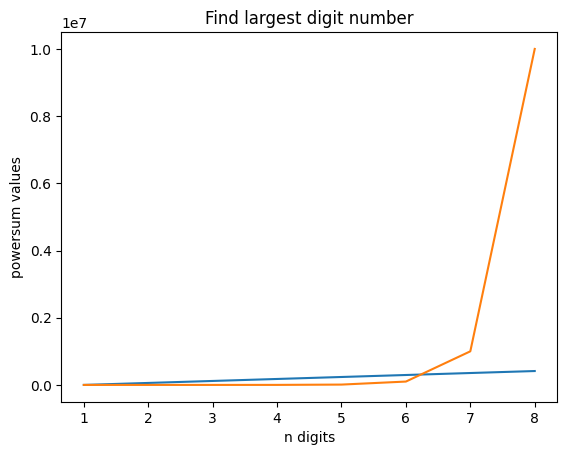

In [65]:
sums = [np.sum([9**5 for _ in range(x)]) for x in range(8)]
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(1, len(sums)+1), sums)
ax.plot(range(1, len(sums)+1), [10**x for x in range(len(sums))])
ax.set_xlabel("n digits")
ax.set_ylabel("powersum values")
ax.set_title("Find largest digit number");

We see that a 6 digit number is the largest we can still possibly express as a sum of fifth powers. So the largest number we have to check is the digit power sum of is 999999. The digit power sum of that number gives us the max of our search:

In [66]:
max_number = np.sum(np.array([9 for _ in range(6)])**5)
print(max_number)

354294


In [67]:
numbers = [x for x in range(2, max_number) if check_power_sum(x, power = 5)]

In [68]:
np.sum(numbers)

443839